In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [1]:
import pandas as pd
import io

# Read the file and fix the formatting
with open('/Users/ethannordman/Desktop/winequality-red.csv', 'r') as f:
    content = f.read()

# Remove all the double quotes from the header
content = content.replace('""', '')
content = content.replace('"', '')

# Read into pandas
df = pd.read_csv(io.StringIO(content), sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Initial Visual analysis

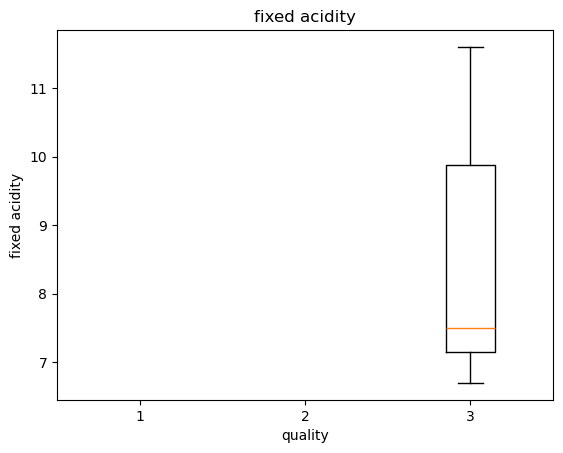

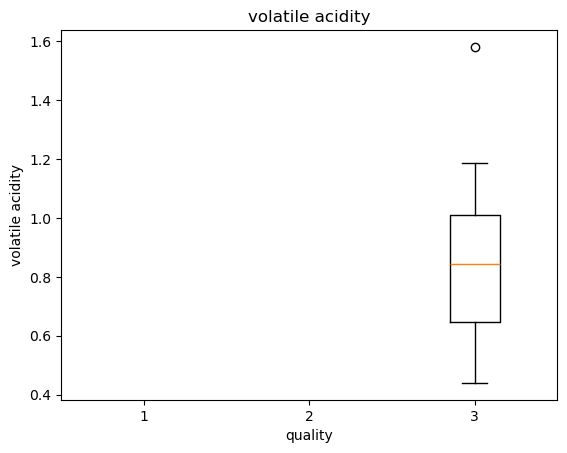

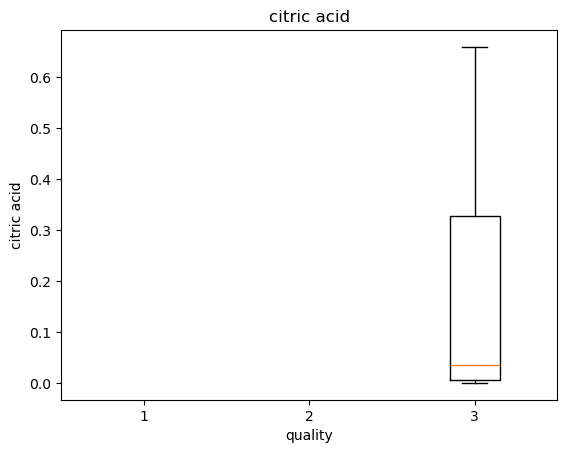

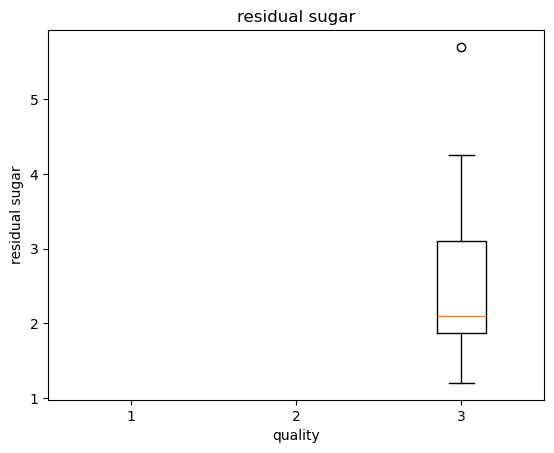

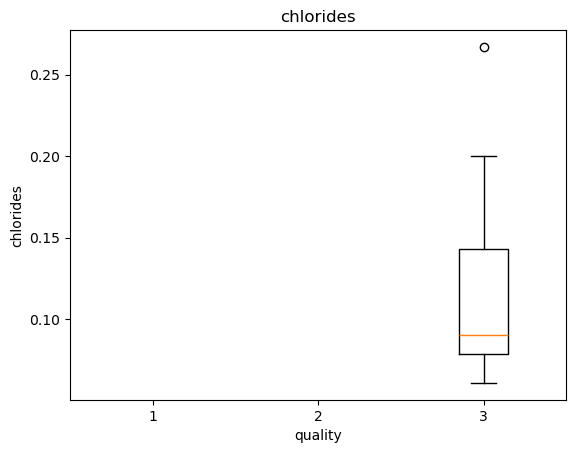

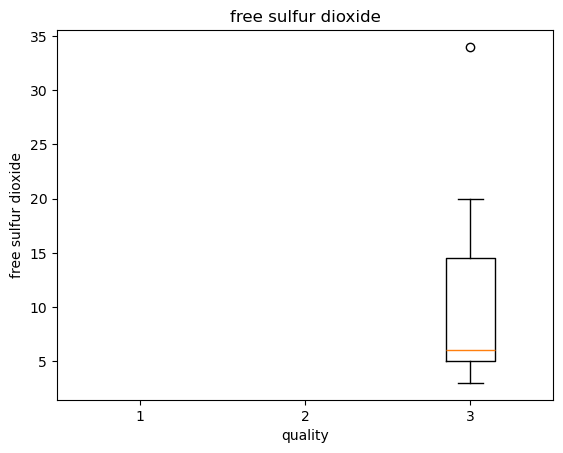

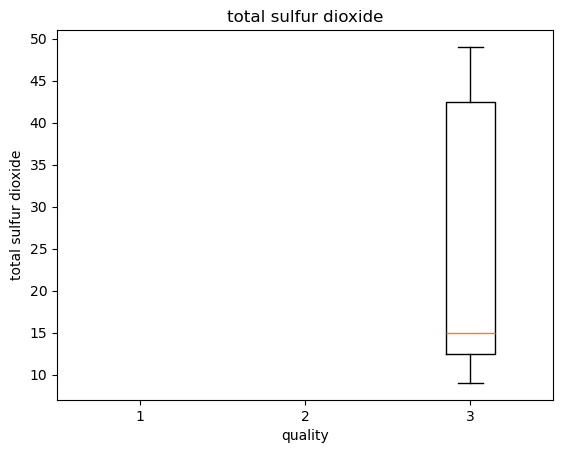

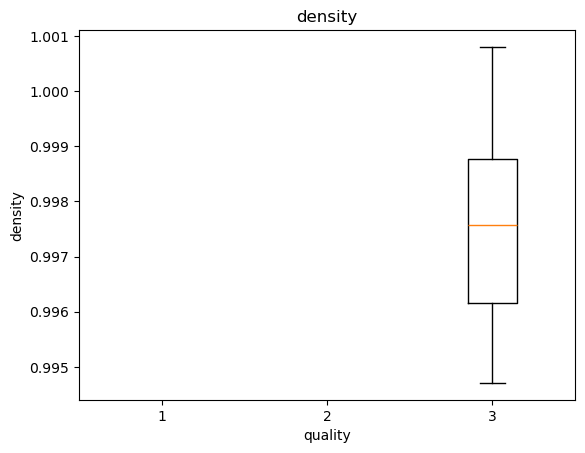

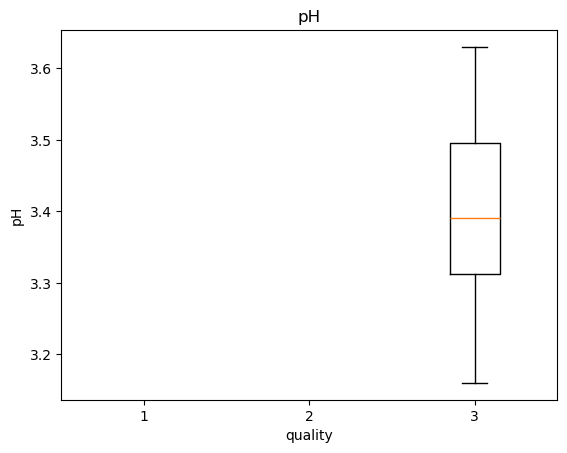

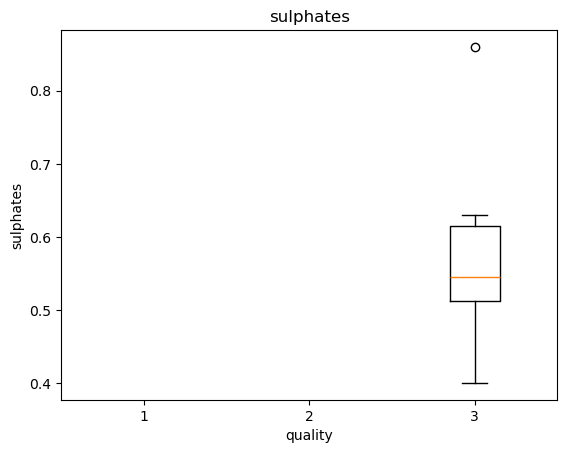

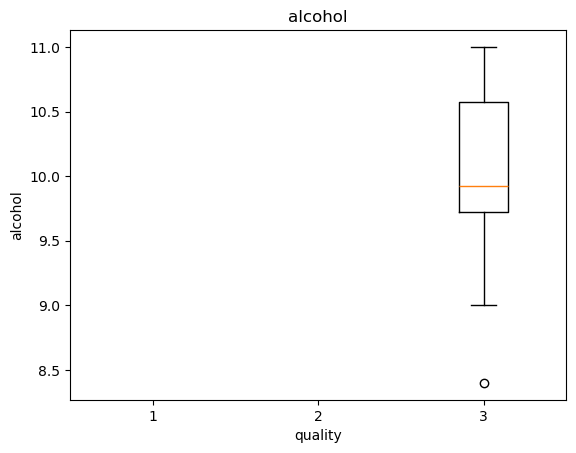

In [3]:
for label in df.columns[:-1]:
    plt.figure()
    plt.boxplot([df[df['quality']==i][label] for i in range(1, 4)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
   
    plt.show()

# Gathering and training and testing data 

In [4]:
bins = [0, 5.5, 7.5, 10] # this is saying 3-5 is low, 6-7 is mid, and 8-9 is high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
X = df[df.columns[:-1]] # input data
y = df['quality'] # output data
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       3
top          1
freq       663
Name: quality, dtype: int64
count     320
unique      3
top         1
freq      174
Name: quality, dtype: int64


# K Nearest Neighbors Classifier

Pick a value for K (e.g., K=3)
For a new data point, find the K closest existing data points
Look at what category those K neighbors belong to
Assign the most common category among those neighbors

Example:
Imagine you want to predict if a wine is "good" or "bad" quality. With K=3:

Find the 3 most similar wines (based on features like acidity, alcohol content, etc.)
If 2 out of 3 are "good," predict "good"
If 2 out of 3 are "bad," predict "bad"

The larger the radius the less accurate your prediction may be

In [7]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(X_train, y_train)
pred_n3 = n3.predict(X_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       141
           1       0.69      0.72      0.71       174
           2       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.67      0.68      0.67       320

0.7138656496062993


In [8]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(X_train, y_train)
pred_n5 = n5.predict(X_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       141
           1       0.70      0.77      0.73       174
           2       0.00      0.00      0.00         5

    accuracy                           0.69       320
   macro avg       0.46      0.46      0.46       320
weighted avg       0.68      0.69      0.68       320

0.7099347933070865


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Forest Classifier

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       141
           1       0.79      0.82      0.80       174
           2       0.00      0.00      0.00         5

    accuracy                           0.78       320
   macro avg       0.52      0.53      0.53       320
weighted avg       0.77      0.78      0.78       320

0.8131766732283465


# Decision Tree Classifier

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       141
           1       0.75      0.75      0.75       174
           2       0.00      0.00      0.00         5

    accuracy                           0.73       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.72      0.73      0.73       320

0.7349593996062993


# Stochastic Gradient Decent

Minimize a loss fucntion:

Minimize the penalty using this classifier


In [11]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=sgd, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       141
           1       0.75      0.75      0.75       174
           2       0.00      0.00      0.00         5

    accuracy                           0.73       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.72      0.73      0.73       320

0.704441437007874
